In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img

import os

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("Documents/humpback-whale-identification/train.csv")


In [3]:
train

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
...,...,...
25356,ffef89eed.jpg,w_9c506f6
25357,fff7faf61.jpg,w_9cf0388
25358,fff9002e0.jpg,w_bd1c3d5
25359,fffcde6fe.jpg,w_9f30885


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   25361 non-null  object
 1   Id      25361 non-null  object
dtypes: object(2)
memory usage: 396.4+ KB


In [5]:
train.describe()

,Image,Id
count,25361,25361
unique,25361,5005
top,0000e88ab.jpg,new_whale
freq,1,9664


# There are 5005 different classes in our dataset

In [6]:
train.shape

(25361, 2)

# We need to identify the Id of whale. So, our output variable will be Id. We need to seperate feature columns and output column.

In [7]:
# put labels into y_train variable
y_train = train["Id"]
# Drop the 'Id' column
xtrain = train.drop(labels = ["Id"], axis = 1)
y_train.head()

0    w_f48451c
1    w_c3d896a
2    w_20df2c5
3    new_whale
4    new_whale
Name: Id, dtype: object

In [8]:
train.isnull().sum()

Image    0
Id       0
dtype: int64

In [9]:
# importing the libraries for image preprocessing
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [10]:
def prepareImages(train, shape, path):
    
    x_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    for fig in train['Image']:
        
        #load images into images of size 100x100x3
        img = load_img("Documents/humpback-whale-identification/"+path+"/"+fig, target_size=(100,100, 3))
        x = img_to_array(img)
        x = preprocess_input(x)

        x_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return x_train

In [11]:
x_train = prepareImages(train, train.shape[0], "train")


Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg
Processing image

In [12]:
x_train = x_train / 255.0 
# rescaling the dataset 
# dividing an image by 255 simply rescales the image from 0-255 to 0-1. 
# (Converting it to float from int makes computation convenient too) 
print("xtrain shape: ",x_train.shape)

xtrain shape:  (25361, 100, 100, 3)


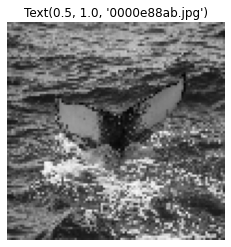

In [13]:
# Checking example input image
plt.imshow(x_train[0][:,:,0], cmap="gray")
plt.title(plt.title(train.iloc[0,0]))
plt.axis("off")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [15]:
y_train = label_encoder.fit_transform(y_train)


In [16]:
y_train[0:10]  

array([4786, 3808,  662,    0,    0,    0, 4315,    0, 1929, 3237])

In [17]:
y_train.shape


(25361,)

In [18]:
# convert to one-hot-encoding
# we got 5005 classes from the function train.Id.describe()

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 5005)

In [19]:
y_train 


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation = "softmax"))

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        9

In [23]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)


In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [25]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [26]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images horizontally
        vertical_flip=False)  # randomly flip images vertically


datagen.fit(x_train)

In [27]:
epochs = 50  # for better result increase the number of epochs
batch_size = 64

In [28]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=50, verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]) 

Epoch 1/50
396/396 - 812s - loss: 6.7359 - accuracy: 0.3276 - lr: 0.0010 - 812s/epoch - 2s/step
Epoch 2/50
396/396 - 831s - loss: 5.3955 - accuracy: 0.3776 - lr: 0.0010 - 831s/epoch - 2s/step
Epoch 3/50
396/396 - 210s - loss: 5.0107 - accuracy: 0.3776 - lr: 0.0010 - 210s/epoch - 531ms/step
Epoch 4/50
396/396 - 190s - loss: 4.6954 - accuracy: 0.3779 - lr: 0.0010 - 190s/epoch - 480ms/step
Epoch 5/50
396/396 - 193s - loss: 4.3890 - accuracy: 0.3779 - lr: 0.0010 - 193s/epoch - 487ms/step
Epoch 6/50
396/396 - 191s - loss: 4.0737 - accuracy: 0.3801 - lr: 0.0010 - 191s/epoch - 484ms/step
Epoch 7/50
396/396 - 214s - loss: 3.7505 - accuracy: 0.3849 - lr: 0.0010 - 214s/epoch - 541ms/step
Epoch 8/50
396/396 - 219s - loss: 3.4195 - accuracy: 0.3879 - lr: 0.0010 - 219s/epoch - 552ms/step
Epoch 9/50
396/396 - 215s - loss: 3.0985 - accuracy: 0.4031 - lr: 0.0010 - 215s/epoch - 542ms/step
Epoch 10/50
396/396 - 202s - loss: 2.7404 - accuracy: 0.4304 - lr: 0.0010 - 202s/epoch - 509ms/step
Epoch 11/50
396

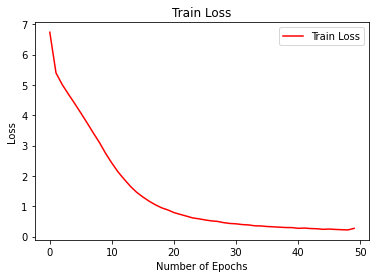

In [29]:
# Plot the loss curve for training
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

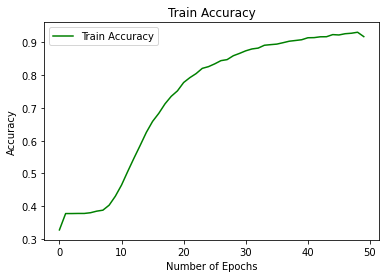

In [31]:
# Plot the accuracy curve for training
plt.plot(history.history['accuracy'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])


Train accuracy of the model:  0.9176582098007202


In [33]:
print('Train loss of the model: ',history.history['loss'][-1])


Train loss of the model:  0.2719210684299469
